In [5]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, model_from_json
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


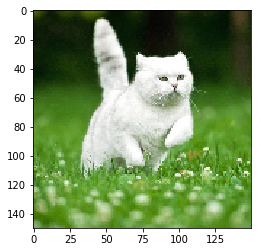

In [73]:
image_file_name = 'white-cat.jpg'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

In [74]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [75]:
json_file = open("cats_and_dogs_cnn.json", "r")
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cats_and_dogs_cnn.h5")

In [76]:
# loaded_model.summary()

In [113]:
activation_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[6].output)


In [114]:
activation = activation_model.predict(img_array)

In [115]:
print(activation.shape)

(1, 34, 34, 64)


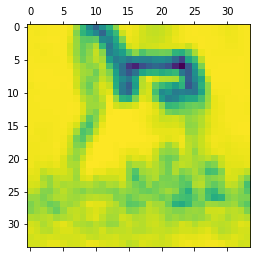

In [116]:
plt.matshow(activation[0, :, :, 0], cmap='viridis')

In [58]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [59]:
display_grid = np.zeros((n_cols * size, images_per_row * size))

In [60]:
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

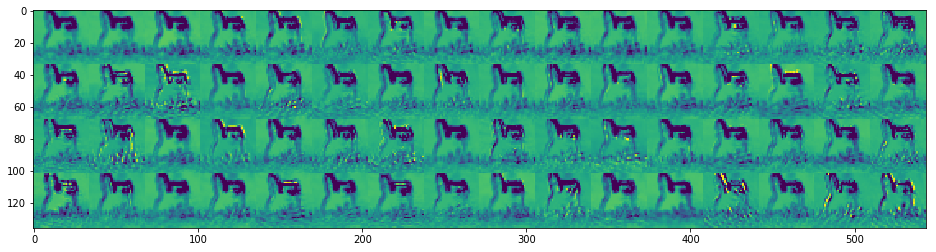

In [61]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

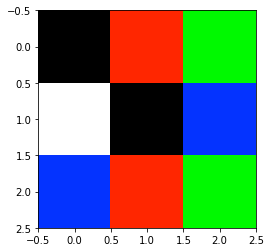

In [23]:
image_file_name = '3x3.png'
img = image.load_img(image_file_name, target_size=(3, 3))
plt.imshow(img)

In [39]:
img_array = image.img_to_array(img)
print(img_array.shape)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)



(3, 3, 3)
(1, 3, 3, 3)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.